# DICOM Files and Medical Image Rendering

## Introduction

In this notebook we will discuss what is a DICOM file and how to work with them. 
We will also discuss basics on medical image rendering. 
We will cover the following points:

* What is a DICOM file, how to open, read and use the information in the file
* Image Rendering and the effect of reducing the encoding bits on the image


## DICOM

DICOM is the most popular standard used in medicine for image exchange. 
The name is derived from **D**igital **I**maging and **CO**mmunication in **M**edicine. 

It allows to have medical information in the images as a standard file that is independent from the manufacturer. 

This means that it is possible to have images from MR scanners made by a GE system and display it in a picture archive system (PACS) from Agfa without need of any proprietary information. 



It also allows opening the image in MATLAB, Python or any language without need to know how GE formatted the image file. We will open here a DICOM image and see some of the information that is stored in the header of the image. 

Python provides some tools for DICOM image opening in the package PyDICOM.

## Opening DICOM for metadata

We can now use the package to open a DICOM file. 

In [2]:
# As usual we will have the magic command for figures inline, but you can use interactive nbagg if you prefer
%matplotlib inline

# And we will start by importing the numerical and ploting packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# As well as the DICOM package
import pydicom

# Get file
RefDs = pydicom.read_file('IM_0028.dcm')

In [3]:
# Let's print all the Metadata here
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20120101'
(0008, 0013) Instance Creation Time              TM: '122531'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.2501708638.4193405253.2729028880.3304384116
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.3397498352.605445821.304410668.1378834227
(0008, 0020) Study Date                          DA: '20110101'
(0008, 0021) Series Date                         DA: '20110101'
(0008, 0022) Acquisition Date                    DA: '20110101'
(0008, 0023) Content Date                        DA: '20110101'
(0008, 0030) Study Time                          TM: '133916'
(0008, 0031) Series Time                         TM: '135504.20'
(0008, 0032) Acquisition Time    

You can browse through that Metadata and see all the information about this image. 

There is a lot of information but we can already easily find out much about this image without having to know much about the specific acquisition details. 

It is clear  this is a **Magnetic Resonance Image** made with a **Philips scanner**.

#### Answer the following questions:


**1. What is the size in pixels of the image?**

Type your answer here

**2. What are the two fields with information about bits used for the image? What is the difference between those numbers?**

Type your answer here

**3. When was this image taken? Is this consistent with the file date? Why would you need this field embedded in the file?**

Type your answer here


## Using DICOM metadata
Let's use code to access the metadata information simply by using the variable

In [4]:
print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturerModelName))
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')

The image is 512x512 pixels
The manufacturer is Philips Medical Systems and the model is Achieva
The image was encoded with 12 bits 


In [5]:
from datetime import datetime   #used to format dates

d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d.date()))
print('The anatomy imaged is '+str(RefDs.BodyPartExamined))
if RefDs.PatientSex=='F':     print('The patient imaged is Female')
else:     print('The patient imaged is Male')
if RefDs.PatientName=='':     print('The patient\'s name is unkown')
else:     print('The patient\'s name is '+str(RefDs.PatientsName))

The image was made on 2011-01-01
The anatomy imaged is LIVER
The patient imaged is Female
The patient's name is unkown


### Activity 1: Modify the code above to also obtain the additional information required to answer the questions

#### Answer the following questions:

**4. What is the patient's weight**

Type your answer here including the line of code you added

**5. How many bits were used to allocate the image?**

Type your answer here including the line of code you added


## Image Rendering

Image rendering is related to all and any of the techniques that are used to show an image to the user. 

This may require some conditioning of the image such as enhancing and restoring the image after noise removal or simply adapting the visualization of the image to the display that is available.

For instance, we may require to change and smooth the image to make use of all the dynamics of a particular screen, or use a logarithmic transform on the image so the user can see details just as we did in the Fourier notebook before for the spatial spectrum.

Let's now then render the image from the information in the DICOM file. First, we need to dimension an array with all the pixels in the image. Then, we can load the information from the file and then show the image.

Let's now then render the image from the information in the DICOM file. First, we need to dimension an array with all the pixels in the image. Then, we can load the information from the file and then show the image.

In [6]:
# To obtain the dimensions of the array to store the image we will use the metadata
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))

# Then initialize in zeros an array
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# Finally we had already read the file and we have the image information in the pixel_array (final field)
ArrayDicom[:,:]=RefDs.pixel_array


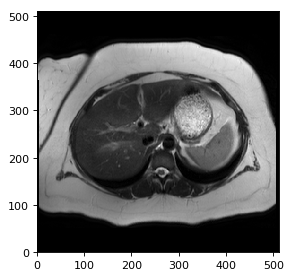

In [7]:
# Some rendering tools to set the size of that image to a specific value dpi and equal axis or square image as well
fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='b')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale

# We could directly show the image using imshow as in the last notebook, but we will try here colormesh (plotting 2D)
# Colormesh will require a horizontal and vertical axes

# This is the actual rendering
plt.pcolormesh(np.arange(RefDs.Rows), np.arange(RefDs.Columns), np.flipud(ArrayDicom[:, :]))

####  Answer the following questions:

**5. What is the function of the flipud used in the code?**

Type your answer here

**6. What should you modify in the code to display the image larger in size?**

Type your answer here including the code line

## Image Encoding

One of the main situations we encounter when rendering an image is a difference in the amount of bit encoding that was used for an image. 

For instance, we may have an image that was encoded by an MRI or a CT using 12 bits but it was later converted into a JPG or PNG file and necessarily lost some information because these techniques will use only 8 bits per pixel.

We will study here the effect that encoding can have in the rendering of an image by presenting the changes on the observed image at different bit encodings. 

In [8]:
# To encode an image we will first normalize it and then multiply by the maximum value allowed by the encoding scheme
# Ensuring that we convert into float
NormIm=1.0*ArrayDicom
NormIm=NormIm/np.max(ArrayDicom)
Im=NormIm*(pow(2,12)-1)  #original encoding at 12 bits
Im=Im.astype(int)
Km=NormIm*(pow(2,8)-1)  #encoding at 8 bits
Km=Km.astype(int)
Lm=NormIm*(pow(2,3)-1)  #encoding at 3 bits
Lm=Lm.astype(int)

Text(0.5, 1.0, 'Encoded at 3 bits Max=7')

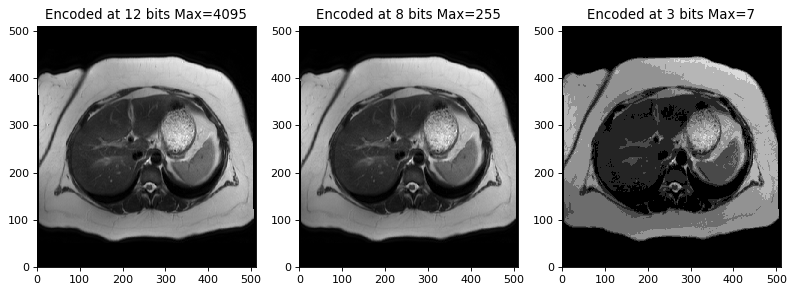

In [11]:
fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='b')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
bp=plt.subplot(131)
plt.pcolormesh(np.arange(RefDs.Rows), np.arange(RefDs.Columns), np.flipud(Im[:, :]))
plt.title('Encoded at 12 bits Max='+str(np.max(Im)))
plt.subplot(132)
plt.pcolormesh(np.arange(RefDs.Rows), np.arange(RefDs.Columns), np.flipud(Km[:, :]))
plt.title('Encoded at 8 bits Max='+str(np.max(Km)))
plt.subplot(133)
plt.pcolormesh(np.arange(RefDs.Rows), np.arange(RefDs.Columns), np.flipud(Lm[:, :]))
plt.title('Encoded at 3 bits Max='+str(np.max(Lm)))

We can observe that we can reduce the encoding to 8 bits without much contrast loss as it would likely happen when converting into a PNG format. 

The main reason for the successful reduction in encoding bits without contrast loss is that the image is mostly dark and the dynamic in 8 bits is enough for the contrast to remain. 

However, it should be possible to reduce to 8 bits with even lower contrast loss if we use image enhancement techniques. 

We will now obtain the **histogram** of the image to observe where most of the information is: a very high number of pixels are dark.

(0, 3000)

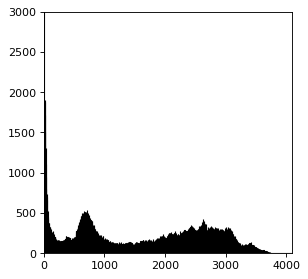

In [12]:
# This uses numpy to generate a histogram
Image=Im
hist,bins = np.histogram(Image.flatten(),np.max(Image),[0,np.max(Image)])

fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='b')

# And we plot the histogram here for the original 12 bit image
plt.hist(Image.flatten(), np.max(Image), [0,np.max(Image)], fc='k', ec='k')
plt.xlim([0,np.max(Image)])
plt.ylim([0,3000])

### Activity 2 - Obtain the histograms for another encoding


**7. What has changed in the resulting histogram?**

Type your answer here including the line of code you modified to obtain the new histogram


We could get better contrast by doing a histogram equalization. This is equivalent to "stretching" the histogram so we can better use the dynamics of tones. 

In [15]:
hist,bins = np.histogram(Im.flatten(),np.max(Im)+1,[0,np.max(Im)])
cdf = hist.cumsum()         
 
cdf = (cdf - cdf.min())*np.max(Im)/(cdf.max()-cdf.min())         
cdf = np.ma.filled(cdf,0).astype('uint16')                

Im2 = cdf[Im]                              

hist,bins = np.histogram(Im2.flatten(),np.max(Im),[0,np.max(Im)])

Text(0.5, 1.0, 'Equalized Histogram')

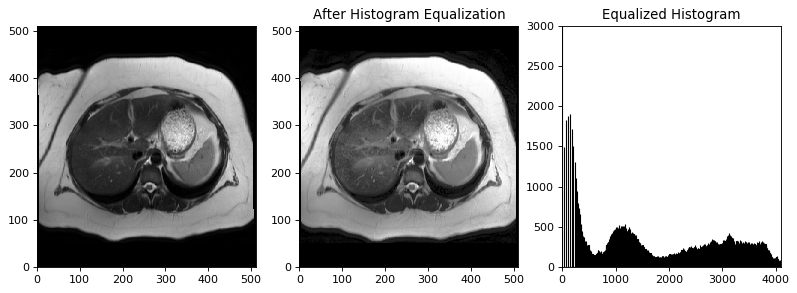

In [18]:
fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='b')
plt.subplot(131)
plt.pcolormesh(np.arange(RefDs.Rows), np.arange(RefDs.Columns), np.flipud(Im[:, :]))
plt.subplot(132)
plt.pcolormesh(np.arange(RefDs.Rows), np.arange(RefDs.Columns), np.flipud(Im2[:, :]))
plt.title('After Histogram Equalization')
plt.subplot(133)
plt.hist(Im2.flatten(), np.max(Im2), [0,np.max(Im2)], fc='k', ec='k') # And we plot the histogram here for the original 12 bit image
plt.xlim([0,np.max(Im2)])
plt.ylim([0,3000])
plt.title('Equalized Histogram')


**8. What has changed in the resulting image?**

Type your answer here 

**9. What can you infer from the histogram, the image and the code about how a histogram equalization works?**

Type your answer here including a brief explanation on what the folowing code line does:

    cdf = (cdf - cdf.min())*np.max(Im)/(cdf.max()-cdf.min())

## Resolution

We will now show interactively the effect of *subsampling* an image.

This means that instead of keeping the original size of the image, only 1 out of N pixels are kept: **resolution is degraded**

The following code is the function for interactively subsampling, followed by the rendering of the image. Use the dropdown widget to change the resolution.

In [19]:
import math
from skimage import exposure
from ipywidgets import Button, HBox, VBox, GridBox, Layout, ButtonStyle, Label, Dropdown, IntSlider, interact, Checkbox,GridspecLayout,interactive

class ImageAnalysis(object):
    '''
    Class to demonstrate some basic concepts of resolution, SNR, and CNR
    '''
    def __init__(self,fname='CenT2.npz',
                 InfoSNR={'Back':[15,55,15,55],'Signal':[225,245,210,230]},
                 InfoCNR={'R1':[225,245,210,230],'R2':[245,265,180,200]},
                 LocTarget=[0.43,0.485,0.035,0.035],
                 bAdjustContrast=True):
        '''
        We will load a prexisting image stored in a numpy file, the parameters are used to identify the regions of interest
        '''
        self.IM=np.load(fname)['IM']
        if bAdjustContrast:
            
            #self.IMA=imadjust(self.IM,tol=1.0)
            v_min, v_max = np.percentile(self.IM, (0.2, 99.8))
            self.IMA=exposure.rescale_intensity(self.IM, in_range=(v_min, v_max),out_range=(0,2047))
        else:
            self.IMA=self.IM
        x=np.arange(self.IM.shape[0])
        y=np.arange(self.IM.shape[1])
        xx,yy=np.meshgrid(x,y)
        self.ROIBack=(xx>=InfoSNR['Back'][0])*(xx<=InfoSNR['Back'][1])*(yy>=InfoSNR['Back'][2])*(yy<=InfoSNR['Back'][3])
        self.ROIBackIm=np.ma.masked_where(self.ROIBack==False,np.ones(self.IM.shape))
        self.ROISignal=(xx>=InfoSNR['Signal'][0])*(xx<=InfoSNR['Signal'][1])*(yy>=InfoSNR['Signal'][2])*(yy<=InfoSNR['Signal'][3])
        self.ROISignalIm=np.ma.masked_where(self.ROISignal==False,np.ones(self.IM.shape))
        self.ROICNRR1=(xx>=InfoCNR['R1'][0])*(xx<=InfoCNR['R1'][1])*(yy>=InfoCNR['R1'][2])*(yy<=InfoCNR['R1'][3])
        self.ROICNRR1Im=np.ma.masked_where(self.ROICNRR1==False,np.ones(self.IM.shape))
        self.ROICNRR2=(xx>=InfoCNR['R2'][0])*(xx<=InfoCNR['R2'][1])*(yy>=InfoCNR['R2'][2])*(yy<=InfoCNR['R2'][3])
        self.ROICNRR2Im=np.ma.masked_where(self.ROICNRR2==False,np.ones(self.IM.shape))
        self.LocTarget=LocTarget
        
    def _ShomQuantification(self,Quantification=0):
        '''
        Function to show the effect to reduce the number of bits
        '''
        OrigBitRes=2**math.ceil(math.log2(len(np.unique(self.IMA))))
        plt.close('all')
        plt.figure(figsize=(17,3.5))
        ax=plt.subplot(1,4,1)
        OrigLevels=len(np.unique(self.IMA))
        im=ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        plt.colorbar(im)
        ax.set_title('Original levels = %i' % (OrigLevels))
        ax.axis('off')
        ax=plt.subplot(1,4,2)
        if Quantification>0:
            v_min, v_max = np.percentile(self.IM, (0.2, 99.8))
            SubQuantified=exposure.rescale_intensity(self.IM,in_range=(v_min, v_max),out_range=(0,Quantification-1))
        else:
            SubQuantified=self.IMA
        NewLevels=len(np.unique(SubQuantified))
        im=ax.imshow(SubQuantified,cmap=plt.cm.get_cmap('gray',NewLevels),extent=[0,1,0,1])
        plt.colorbar(im)
        ax.set_title('Sub-sampled levels = %i' % (NewLevels))
        ax.axis('off')
        
        ax=plt.subplot(1,4,3)
        im=ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        plt.colorbar(im)
        ax.set_title('Original - zoom')
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.4,0.6)
        L=self.LocTarget
        ax.arrow(L[0],L[1],L[2],L[3],color='fuchsia',linewidth=2)
        ax=plt.subplot(1,4,4)
        im=ax.imshow(SubQuantified,cmap=plt.cm.get_cmap('gray',NewLevels),extent=[0,1,0,1])
        plt.colorbar(im)
        ax.set_title('Sub-sampled')
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.4,0.6)
        ax.arrow(L[0],L[1],L[2],L[3],color='fuchsia',linewidth=2)
                     
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    def _ShowImRes(self,SubSample=1):
        '''
        Function to show the effect to sub-sample an image (using parameter SubSample), to mimic reduction of resolution
        '''
        plt.close('all')
        plt.figure(figsize=(16,5))
        ax=plt.subplot(1,4,1)
        ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.set_title('Original')
        ax.axis('off')
        ax=plt.subplot(1,4,2)
        ax.imshow(self.IMA[0::SubSample,::SubSample],cmap=plt.cm.gray,extent=[0,1,0,1])
        
        ax.set_title('Sub-sampled=%i' %(SubSample))
        ax.axis('off')
        ax=plt.subplot(1,4,3)
        ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.set_title('Original - zoom')
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.4,0.6)
        L=self.LocTarget
        ax.arrow(L[0],L[1],L[2],L[3],color='fuchsia',linewidth=2)
        ax=plt.subplot(1,4,4)
        ax.imshow(self.IMA[0::SubSample,::SubSample],cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.set_title('Sub-sampled=%i - zoom' %(SubSample))
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.4,0.6)
        ax.arrow(L[0],L[1],L[2],L[3],color='fuchsia',linewidth=2)
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    def _GetNoise(self,sigma):
        row,col= self.IM.shape
        mean = 0
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        return gauss
        
    def _ShowImSNR(self,Noise=0):
        '''
        Function to show the effect to Gaussian noise level with an std. deviation equal to Noise
        '''
        plt.close('all')
        plt.figure(figsize=(16,5))
        ax=plt.subplot(1,4,1)
        ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.imshow(self.ROIBackIm,cmap=plt.cm.hot,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.imshow(self.ROISignalIm,cmap=plt.cm.cool,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        SNR=self.IMA[self.ROISignal].mean()/self.IMA[self.ROIBack].std()
        ax.set_title('Orig. SNR =%3.1f' %(SNR))
        ax.axis('off')
        
        ax=plt.subplot(1,4,2)
        if Noise>0:
            NoiseImage=self._GetNoise(Noise)+self.IMA
        else:
            NoiseImage=self.IMA
        ax.imshow(NoiseImage,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.imshow(self.ROIBackIm,cmap=plt.cm.hot,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.imshow(self.ROISignalIm,cmap=plt.cm.cool,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        SNR=NoiseImage[self.ROISignal].mean()/NoiseImage[self.ROIBack].std()
        ax.set_title('Noisy, SNR=%3.1f' %(SNR))
        ax.axis('off')
        ax=plt.subplot(1,4,3)
        ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.set_title('Original - zoom')
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.4,0.6)
        L=self.LocTarget
        ax.arrow(L[0],L[1],L[2],L[3],color='fuchsia',linewidth=2)
        ax=plt.subplot(1,4,4)
        ax.imshow(NoiseImage,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.set_title('Noisy - zoomf')
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.4,0.6)
        ax.arrow(L[0],L[1],L[2],L[3],color='fuchsia',linewidth=2)
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    def _ShowImCNR(self,KernelSize=0):
        '''
        Function to show the effect of average operator (using convolution) to demonstrate changes in CNR
        '''
        plt.close('all')
        plt.figure(figsize=(16,5))
        ax=plt.subplot(1,4,1)
        ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.imshow(self.ROICNRR1Im,cmap=plt.cm.cool,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.imshow(self.ROICNRR2Im,cmap=plt.cm.winter,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        CNR=np.abs((self.IMA[self.ROICNRR1].mean()-self.IMA[self.ROICNRR2].mean()))/np.sqrt(self.IMA[self.ROICNRR1].std()**2+self.IMA[self.ROICNRR2].std()**2)
        ax.set_title('Orig. CNR =%3.1f' %(CNR))
        ax.axis('off')
        
        ax=plt.subplot(1,4,2)
        if KernelSize==0:
            AvgImage=self.IMA
        else:
            convOpe=np.ones((KernelSize,KernelSize))
            convOpe[:]/=convOpe.sum() #we can create a spatial average operator using 2d kernel with same values
            AvgImage=convolve2d(self.IMA,convOpe,'same')
        ax.imshow(AvgImage,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.imshow(self.ROICNRR1Im,cmap=plt.cm.cool,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.imshow(self.ROICNRR2Im,cmap=plt.cm.winter,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        #as mentioned above, we are keeping the original image for the background signal
        CNR=np.abs((AvgImage[self.ROICNRR1].mean()-AvgImage[self.ROICNRR2].mean()))/np.sqrt(self.IMA[self.ROICNRR1].std()**2+self.IMA[self.ROICNRR2].std()**2)
        
        ax.set_title('Avg. CNR =%3.1f' %(CNR))
        ax.axis('off')
        ax=plt.subplot(1,4,3)
        ax.imshow(self.IMA,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.imshow(self.ROICNRR1Im,cmap=plt.cm.cool,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.imshow(self.ROICNRR2Im,cmap=plt.cm.winter,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.set_title('Original - zoom')
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.5,0.7)
        ax=plt.subplot(1,4,4)
        ax.imshow(AvgImage,cmap=plt.cm.gray,extent=[0,1,0,1])
        ax.imshow(self.ROICNRR1Im,cmap=plt.cm.cool,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.imshow(self.ROICNRR2Im,cmap=plt.cm.winter,vmin=0,vmax=1.1,extent=[0,1,0,1],alpha=0.3)
        ax.set_title('Avg. - zoom')
        ax.axis('off')
        ax.set_xlim(0.4,0.6)
        ax.set_ylim(0.5,0.7)
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    def ShowRes(self):
        Sel=Dropdown(
                    options=[['512x512',1],['256x256',2],['128x128',4],['64x64',8],['32x32',16],['16x16',32]],
                    value=1,
                    description='Resolution',
                    disabled=False,
                    layout=Layout(width='200px')
                    )
        
        interact(self._ShowImRes,SubSample=Sel)
        
    def ShowSNR(self):
        Sel=IntSlider(min=0,max=500,
                    value=0,
                    description='Noise, $\sigma$',
                    disabled=False,
                    continuous_update=False,
                    layout=Layout(width='400px')
                    )
        
        interact(self._ShowImSNR,Noise=Sel)
        
    def ShowCNR(self):
        Sel=IntSlider(min=1,max=100,
                    value=1,
                    description='Average op. size',
                    disabled=False,
                    continuous_update=False,
                    layout=Layout(width='400px')
                    )
        
        interact(self._ShowImCNR,KernelSize=Sel)
        
    def ShowAcqLevels(self):
        Sel=Dropdown(
                    options=2**np.arange(1,12),
                    value=2048,
                    description='# steps.',
                    disabled=False,
                    layout=Layout(width='200px')
                    )
        
        interact(self._ShomQuantification,Quantification=Sel)

In [20]:
ImWork=ImageAnalysis();
ImWork.ShowRes()

interactive(children=(Dropdown(description='Resolution', layout=Layout(width='200px'), options=(['512x512', 1]…

**10. What is the effect for a user on the reduction of resolution?**

Type your answer here 

## Challenge \# 4 - Histogram Equalization

Add equations and explainations to the code used for equalization. 


## Challenge \# 5 - Interactive plot

Make an interactive rendering that provides a sliding tool to define the bits for encoding (You can reuse the code introduced here for resolution)

## Summary

In this example we:

* Analyzed the impact of reducing the encoding bits in an image on the rendered result
* Investigated a histogram equalization technique to better use the dynamic provided by the encoding bits
* Analyzed the impact of reducing the resolution of an image on the rendered reseult

Comments and corrections welcome!

References
---------------

* Tinku Acharya and Ajoy K. Ray, *Image Processing - Principles and Applications*. Wiley InterScience, 2006.